<a href="https://colab.research.google.com/github/harsh-kmr/ml_projects/blob/master/deep_learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Deep Learning

## TensorFlow

### Basic

In [ ]:
import tensorflow as tf
import matplotlib.pyplot as mtp

tf.version

<module 'tensorflow._api.v2.version' from '/usr/local/lib/python3.8/dist-packages/tensorflow/_api/v2/version/__init__.py'>

TensorFlow is called 'TensorFlow' because it handles the flow (node/mathematical operation) of Tensors(Tensors are multi-dimensional arrays with a uniform type) . Tensors are represented as n-dimensional arrays of base dataypes such as a string or integer 

The shape of a Tensor defines its number of dimensions and the size of each 
dimension. The rank of a Tensor provides the number of dimensions (n-dimensions)

---

In [ ]:
sport = tf.constant("Tennis", tf.string)
number = tf.constant(1.41421356237, tf.float64)

print("`sport` is a {}-d Tensor".format(tf.rank(sport).numpy()))
print("`number` is a {}-d Tensor".format(tf.rank(number).numpy()))

`sport` is a 0-d Tensor
`number` is a 0-d Tensor


Tensors have shapes. Some vocabulary:

1. Shape: The length (number of elements) of each of the axes of a tensor.

2. Rank: Number of tensor axes. A scalar has rank 0, a vector has rank 1, a matrix is rank 2.

3. Axis or Dimension: A particular dimension of a tensor.

4. Size: The total number of items in the tensor, the product of the shape vector's elements.



In [ ]:
sports = tf.constant(["Tennis", "Basketball"], tf.string)
numbers = tf.constant([3.141592, 1.414213, 2.71821], tf.float64)

print("`sports` is a {}-d Tensor with shape: {}".format(tf.rank(sports).numpy(), tf.shape(sports)))
print("`numbers` is a {}-d Tensor with shape: {}".format(tf.rank(numbers).numpy(), tf.shape(numbers)))

`sports` is a 1-d Tensor with shape: [2]
`numbers` is a 1-d Tensor with shape: [3]


In [ ]:
matrix = tf.constant([1,2,3,4,5,6], dtype=tf.int32, shape=(2,3))

matrix

<tf.Tensor: shape=(2, 3), dtype=int32, numpy=
array([[1, 2, 3],
       [4, 5, 6]], dtype=int32)>

In [ ]:
reshaped = tf.reshape(matrix,[2*3])
reshaped2 = tf.reshape(matrix,[-1])
reshaped2

<tf.Tensor: shape=(6,), dtype=int32, numpy=array([1, 2, 3, 4, 5, 6], dtype=int32)>

Reshaping will "work" for any new shape with the same total number of elements, but it will not do anything useful if you do not respect the order of the axes.

In [ ]:
x = tf.constant([1, 2, 3])

y = tf.constant(2)
z = tf.constant([2, 2, 2])
# All of these are the same computation
print(tf.multiply(x, 2))
print(x * y)
print(x * z)

tf.Tensor([2 4 6], shape=(3,), dtype=int32)
tf.Tensor([2 4 6], shape=(3,), dtype=int32)
tf.Tensor([2 4 6], shape=(3,), dtype=int32)


Broadcasting is a concept borrowed from the equivalent feature in NumPy. In short, under certain conditions, smaller tensors are "stretched" automatically to fit larger tensors when running combined operations on them.

In [ ]:
tf.constant("🥳👍")

<tf.Tensor: shape=(), dtype=string, numpy=b'\xf0\x9f\xa5\xb3\xf0\x9f\x91\x8d'>

A tensor with variable numbers of elements along some axis is called "ragged". Use tf.ragged.RaggedTensor for ragged data.

In [ ]:
a = tf.constant([[15,16],[17,18]])
b = tf.constant([10,10])

# Add them!
c1 = tf.add(a,b)
c2 = a + b # TensorFlow overrides the "+" operation so that it is able to act on Tensors
print(c1)
print(c2)

tf.Tensor(
[[25 26]
 [27 28]], shape=(2, 2), dtype=int32)
tf.Tensor(
[[25 26]
 [27 28]], shape=(2, 2), dtype=int32)


In [ ]:
def func(a,b):
  '''TODO: Define the operation for c, d, e (use tf.add, tf.subtract, tf.multiply).'''
  c = tf.add(a,b)
  d = tf.subtract(b,1)
  e = tf.multiply(c,d)
  return e

In [ ]:
func(a,b)

<tf.Tensor: shape=(2, 2), dtype=int32, numpy=
array([[225, 234],
       [243, 252]], dtype=int32)>

In [ ]:
a, b = 1.5, 2.5
# Execute the computation
e_out = func(a,b)
print(e_out)

tf.Tensor(6.0, shape=(), dtype=float32)


### Neural networks in TensorFlow

TensorFlow uses a high-level API called Keras that provides a powerful, intuitive framework for building and training deep learning models.

Tensors can flow through abstract types called Layers -- the building blocks of neural networks. Layers implement common neural networks operations, and are used to update weights, compute losses, and define inter-layer connectivity.

In [ ]:
!pip install mitdeeplearning
import mitdeeplearning as mdl

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 26.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for mitdeeplearning: filename=mitdeeplearning-0.3.0-py3-none-any.whl size=2117321 sha256=d7c1039a31375c926fcc59865ac84657dc5240df60d5bda93f495da555d98020
  Stored in directory: /root/.cache/pip/wheels/19/c0/52/2040d66086999bcba703a7c41a8c12c4078f2584372437a7f0
Successfully built mitdeeplearning


In [ ]:
class OurDenseLayer(tf.keras.layers.Layer):
  def __init__(self, n_output_nodes):
    super(OurDenseLayer, self).__init__()
    self.n_output_nodes = n_output_nodes

  def build(self, input_shape):
    d = int(input_shape[-1])
    # Define and initialize parameters: a weight matrix W and bias b
    # Note that parameter initialization is random!
    self.W = self.add_weight("weight", shape=[d, self.n_output_nodes]) # note the dimensionality
    self.b = self.add_weight("bias", shape=[1, self.n_output_nodes]) # note the dimensionality

  def call(self, x):
    '''TODO: define the operation for z (hint: use tf.matmul)'''
    z = tf.add(tf.matmul(x,self.W),self.b)

    '''TODO: define the operation for out (hint: use tf.sigmoid)'''
    y = tf.sigmoid(z)
    return y


In [ ]:

# Since layer parameters are initialized randomly, we will set a random seed for reproducibility
tf.random.set_seed(1)
layer = OurDenseLayer(3)
layer.build((1,2))
x_input = tf.constant([[1,2.]], shape=(1,2))
y = layer.call(x_input)

# test the output!
print(y.numpy())
mdl.lab1.test_custom_dense_layer_output(y)

[[0.26978594 0.45750415 0.6653695 ]]
[PASS] test_custom_dense_layer_output


True

Conveniently, TensorFlow has defined a number of Layers that are commonly used in neural networks, for example a Dense. Now, instead of using a single Layer to define our simple neural network, we'll use the Sequential model from Keras and a single Dense layer to define our network. With the Sequential API, you can readily create neural networks by stacking together layers like building blocks.


In [ ]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

# Define the number of outputs
n_output_nodes = 3

# First define the model 
model = Sequential()

'''TODO: Define a dense (fully connected) layer to compute z'''
# Remember: dense layers are defined by the parameters W and b!
# You can read more about the initialization of W and b in the TF documentation :) 
# https://www.tensorflow.org/api_docs/python/tf/keras/layers/Dense?version=stable
dense_layer = Dense(n_output_nodes, activation='sigmoid')

# Add the dense layer to the model
model.add(dense_layer)

In [ ]:
# Test model with example input
x_input = tf.constant([[1,2.]], shape=(1,2))

'''TODO: feed input into the model and predict the output!'''

model_output = model(x_input)
print(model_output)

tf.Tensor([[0.5607363  0.65668976 0.1249697 ]], shape=(1, 3), dtype=float32)


### digit classification

In [ ]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [ ]:
(X_train, y_train) , (X_test, y_test) = keras.datasets.mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [ ]:
len(X_train)

60000

In [ ]:
X_train[0].shape

(28, 28)

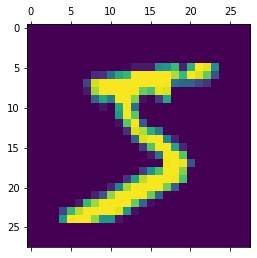

In [ ]:
plt.matshow(X_train[0])

In [ ]:
X_train_flattened = X_train.reshape(len(X_train), -1)/255
X_test_flattened = X_test.reshape(len(X_test), -1)/255

scaling improves the accuracy.

In [ ]:
X_train_flattened.shape

(60000, 784)

input: 784

output: 10 

784 input to 10 output

simple NN without any hidden layer

<img src="https://raw.githubusercontent.com/codebasics/deep-learning-keras-tf-tutorial/0981fe55db7a7abf19ff1d852d9a59153289641e/1_digits_recognition/digits_nn.jpg"/>

In [ ]:
model = keras.Sequential(keras.layers.Dense(10,input_shape=(784,), activation="sigmoid", ))
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
model.fit(X_train_flattened, y_train, epochs= 5)

Epoch 1/5
1875/1875 [==============================] - 5s 2ms/step - loss: 0.4711 - accuracy: 0.8765
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3030 - accuracy: 0.9154
Epoch 3/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2830 - accuracy: 0.9205
Epoch 4/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2733 - accuracy: 0.9238
Epoch 5/5
1875/1875 [==============================] - 9s 5ms/step - loss: 0.2665 - accuracy: 0.9257


In [ ]:
model.evaluate(X_test_flattened, y_test)

313/313 [==============================] - 2s 5ms/step - loss: 0.2734 - accuracy: 0.9234


[0.27340176701545715, 0.9233999848365784]

y_predicted will be an array of _________ , where the highest value represent the class/ category the data point will belong to.

In [ ]:
y_predicted = model.predict(X_test_flattened)
y_predicted[0]

313/313 [==============================] - 0s 1ms/step


array([2.5934583e-02, 3.4278708e-07, 3.0121421e-02, 9.6424001e-01,
       2.8854734e-03, 1.0588464e-01, 1.2574877e-06, 9.9984121e-01,
       8.1593089e-02, 6.4582717e-01], dtype=float32)

In [ ]:
y_test[0]

7

In [ ]:
y_predicted_labels = [np.argmax(i) for i in y_predicted]

In [ ]:
y_predicted_labels[:5]

[7, 2, 1, 0, 4]

In [ ]:
y_test[:5]

array([7, 2, 1, 0, 4], dtype=uint8)

Text(33.0, 0.5, 'Truth')

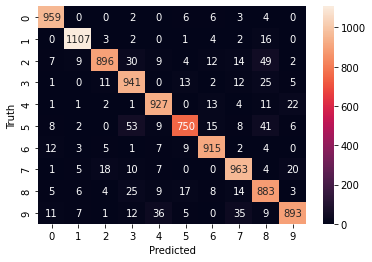

In [ ]:
cm = tf.math.confusion_matrix(y_test, y_predicted_labels)

import seaborn as sn

%matplotlib inline
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

using hidden layer

786--->100--->10

In [ ]:
model2 = keras.Sequential()
model2.add(keras.layers.Dense(100, input_shape=(784,)))
model2.add(keras.layers.Dense(10, activation='sigmoid'))

model2.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

In [ ]:
model2.fit(X_train_flattened, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3630 - accuracy: 0.8972
Epoch 2/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2959 - accuracy: 0.9171
Epoch 3/5
1875/1875 [==============================] - 10s 6ms/step - loss: 0.2843 - accuracy: 0.9209
Epoch 4/5
1875/1875 [==============================] - 13s 7ms/step - loss: 0.2800 - accuracy: 0.9215
Epoch 5/5
1875/1875 [==============================] - 12s 6ms/step - loss: 0.2733 - accuracy: 0.9236


In [ ]:
model3 = keras.Sequential()
model3.add(keras.layers.Dense(100, input_shape=(784,), activation='relu'))
model3.add(keras.layers.Dense(10, activation='sigmoid'))

model3.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

In [ ]:
model3.fit(X_train_flattened, y_train, epochs=5)

In [ ]:
model2.evaluate(X_test_flattened,y_test)

In [ ]:
model3.evaluate(X_test_flattened,y_test)

In [ ]:
y_predicted = model3.predict(X_test_flattened)
y_predicted_labels = [np.argmax(i) for i in y_predicted]
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_predicted_labels)

plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

Using Flatten layer so that we don't have to call .reshape on input dataset

In [ ]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(100, activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(X_train/255, y_train, epochs=5)

In [ ]:
model.evaluate(X_test/255,y_test)

In [ ]:
y_pred= model.predict(X_test/255)

313/313 [==============================] - 1s 2ms/step


In [ ]:
y_predicted_labels = [np.argmax(i) for i in y_pred]
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_predicted_labels)

plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

### activation function

In artificial neural networks, the activation function of a node defines the output of that node given an input or set of inputs.

purpose of activation function is to introduce non linearity in network

some common activation function are 🔻


*   Sigmoid
*   ReLU
*   Tanh


sigmoid :- is same as logistic regression.

Y(x) = Sigmoid(x) = 1/(1+e^-x)

ReLU(x):

{ 0 x<0

x  x>=0

<img src="https://wikimedia.org/api/rest_v1/media/math/render/svg/f5ae4481873b5c6117772f69d22b262a24f38e7c" background="white" />

### dropout regularization

In [ ]:
import pandas as pd
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt


In [ ]:
url ="https://raw.githubusercontent.com/harsh-kmr/ml_projects/master/sonar.csv"

In [ ]:
df =pd.read_csv(url, header=None)

df.head()

In [ ]:
df.isna().sum()

In [ ]:
df[60].unique()

In [ ]:
df= pd.get_dummies(df, columns=[60,],drop_first=True)

df.head()

In [ ]:
df.describe()

In [ ]:
from sklearn.model_selection import train_test_split
import seaborn as sn
from sklearn.metrics import confusion_matrix , classification_report

In [ ]:
x = df.drop(columns=['60_R',])
y = df['60_R']

x.shape, y.shape

without dropout

In [ ]:
def ANN(X,y):
  x_train, x_test, y_train,y_test = train_test_split(X,y,test_size=0.25, random_state=1, stratify= y)

  model = keras.Sequential([
      keras.layers.Dense(60, input_dim=60, activation='relu'),
      keras.layers.Dense(30, activation='relu'),
      keras.layers.Dense(15, activation='relu'),
      keras.layers.Dense(1, activation='sigmoid')
  ])

  model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

  model.fit(x_train, y_train, epochs=100, batch_size=8)

  print(model.evaluate(x_test, y_test))

  y_preds = model.predict(x_test)
  y_preds = np.round(y_preds)

  print("Classification Report: \n", classification_report(y_test, y_preds))

  cm = tf.math.confusion_matrix(labels=y_test,predictions=y_preds)
  plt.figure(figsize = (10,7))
  sn.heatmap(cm, annot=True, fmt='d')
  plt.xlabel('Predicted')
  plt.ylabel('Truth')

WITH DROPOUT

In [ ]:
def ANN_dropout(X,y, dropout):
  x_train, x_test, y_train,y_test = train_test_split(X,y,test_size=0.3, random_state=42, stratify= y)

  model = keras.Sequential([
      keras.layers.Dense(60, input_dim=60, activation='relu'),
      keras.layers.Dropout(0.5),
      keras.layers.Dense(30, activation='relu'),
      keras.layers.Dropout(0.5),
      keras.layers.Dense(15, activation='relu'),
      keras.layers.Dropout(0.5),
      keras.layers.Dense(1, activation='sigmoid')
  ])

  model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

  model.fit(x_train, y_train, epochs=100, batch_size=8)

  print(model.evaluate(x_test, y_test))

  y_preds = model.predict(x_test)
  y_preds = np.round(y_preds)

  print("Classification Report: \n", classification_report(y_test, y_preds))

  cm = confusion_matrix(y_test,y_preds)
  plt.figure(figsize = (10,7))
  sn.heatmap(cm, annot=True, fmt='d')
  plt.xlabel('Predicted')
  plt.ylabel('Truth')


In [ ]:
ANN(x,y)

In [ ]:
ANN_dropout(x,y, 0.5)

### churn prediction

#### telephone company

In [ ]:
url ="https://raw.githubusercontent.com/codebasics/deep-learning-keras-tf-tutorial/master/11_chrun_prediction/customer_churn.csv"

In [ ]:
import pandas as pd 
import numpy as np

In [ ]:
df = pd.read_csv(url)

In [ ]:
df.head()

In [ ]:
df.Churn.value_counts()

data is skewed but we donot care about that for now

we can drop customerID as it doesnt provide any useful information

In [ ]:
df.drop(columns = ['customerID',], inplace= True )

In [ ]:
df.isna().sum()

In [ ]:
df2 = pd.get_dummies(data = df,columns=['gender'], drop_first =True )


df2.head()

In [ ]:
df2.dtypes

In [ ]:
objeType = []

for col in df2.columns:
  if df2[col].dtypes == object:
    objeType.append(col)

objeType

In [ ]:
for col in objeType:
  print(col, ':', df2[col].unique())

lets turn all no................. into no

In [ ]:
def fun(word):
  word = word.lower()
  if 'no' in word:
    return 0
  elif 'yes' in word:
    return 1
  else:
    return word

In [ ]:
for col in objeType:
  df2[col] = df2[col].apply(fun)

df2.head()

update objeType

In [ ]:
objeType = []

for col in df2.columns:
  if df2[col].dtypes == object:
    objeType.append(col)

objeType

we can change total charge to number as it is present as string

In [ ]:
#pd.to_numeric(df2['TotalCharges'])

there are some empty string that cannot be changed into number.
we can remove them or replace it it zero/null and later replace it avg value or any other missing values handaling method.

In [ ]:
df2[df2['TotalCharges']== " "].shape, df2.shape

we can easily drop the empty total charges rows

In [ ]:
df3 = df2[df2['TotalCharges']!= " "]

In [ ]:
objeType = []

for col in df3.columns:
  if df3[col].dtypes == object:
    objeType.append(col)

objeType

In [ ]:
df3['TotalCharges'] = pd.to_numeric(df3['TotalCharges'])

In [ ]:
objeType = []

for col in df3.columns:
  if df3[col].dtypes == object:
    objeType.append(col)

objeType

In [ ]:
for col in objeType:
  print(col, ':', df3[col].unique())

In [ ]:
df4 = pd.get_dummies(data= df3, columns=objeType)



In [ ]:
df4.dtypes

In [ ]:
x = df4.drop(columns=['Churn',])
y = df4['Churn']

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
tenure_churn_no = df4[df4.Churn==0].tenure
tenure_churn_yes = df4[df4.Churn==1].tenure
plt.xlabel("tenure")
plt.ylabel("Number Of Customers")
plt.title("Customer Churn Prediction Visualiztion")
plt.hist([tenure_churn_yes, tenure_churn_no], rwidth=0.95, color=['green','red'],label=['Churn=Yes','Churn=No'])
plt.legend()

In [ ]:
MonthlyCharges_churn_no = df4[df4.Churn==0].MonthlyCharges
MonthlyCharges_churn_yes = df4[df4.Churn==1].MonthlyCharges
plt.xlabel("MonthlyCharges")
plt.ylabel("Number Of Customers")
plt.title("Customer Churn Prediction Visualiztion")
plt.hist([MonthlyCharges_churn_yes, MonthlyCharges_churn_no], rwidth=0.95, color=['green','red'],label=['Churn=Yes','Churn=No'])
plt.legend()

lets build a **ANN** model

In [ ]:
import tensorflow as tf
from tensorflow import keras

In [ ]:
model = keras.Sequential([
    keras.layers.Input(shape= (26,)),
    keras.layers.Dense(10, activation='relu'),
    keras.layers.Dense(5, activation='relu'),
    keras.layers.Dense(1, activation= 'sigmoid'),
]
)

In [ ]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train, y_test = train_test_split(x, y, test_size= 0.3, stratify=y)

In [ ]:
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.fit(x_train, y_train, epochs=20)

In [ ]:
model.evaluate(x_test, y_test)

In [ ]:
yp = model.predict(x_test)
y_pred = []
for element in yp:
    if element > 0.5:
        y_pred.append(1)
    else:
        y_pred.append(0)

In [ ]:
from sklearn.metrics import confusion_matrix , classification_report

print(classification_report(y_test,y_pred))

In [ ]:
import seaborn as sn
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_pred)

plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

#### bank churn

In [ ]:
url = 'https://raw.githubusercontent.com/harsh-kmr/ml_projects/master/datasets/Churn_Modelling.csv'

In [ ]:
import pandas as pd 

In [ ]:
df = pd.read_csv(url)

df.head()

we can drop the "RowNumber	CustomerId	Surname" columns

In [ ]:
df.drop(columns=['RowNumber',	'CustomerId',	'Surname',], inplace = True)

In [ ]:
df.dtypes

In [ ]:
df.Geography.unique()

In [ ]:
df = pd.get_dummies(data= df, columns=['Gender','Geography', ])

In [ ]:
df.head()

In [ ]:
import matplotlib.pyplot as plt


CreditScore_churn_no = df[df.Exited==0].CreditScore
CreditScore_churn_yes = df[df.Exited==1].CreditScore
plt.xlabel("CreditScore")
plt.ylabel("Number Of Customers")
plt.title("bank Churn Prediction Visualiztion")
plt.hist([CreditScore_churn_yes, CreditScore_churn_no], rwidth=0.95, color=['green','red'],label=['Exited=Yes','Exited=No'])
plt.legend()

In [ ]:
df.describe()

lets scale the datas

In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

In [ ]:
df.Exited.value_counts()

data is skewed but we donot care about that right now

25% of balances are zero, so lets do some visualisation

In [ ]:
Balance_churn_no = df[df.Exited==0].Balance	
Balance_churn_yes = df[df.Exited==1].Balance	
plt.xlabel("Balance")
plt.ylabel("Number Of Customers")
plt.title("bank Churn Prediction Visualiztion")
plt.hist([Balance_churn_yes, Balance_churn_no], rwidth=0.95, color=['green','red'],label=['Exited=Yes','Exited=No'])
plt.legend()

In [ ]:
x = df.drop(columns= ['Exited'])
y = df['Exited']

lets build a **ANN** model

In [ ]:
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.metrics import confusion_matrix , classification_report
import seaborn as sn

In [ ]:
def ANN(x,y):
  model = keras.Sequential([
      keras.layers.Input(shape= (13,)),
      keras.layers.Dense(10, activation='relu'),
      keras.layers.Dense(1, activation= 'sigmoid'),])
  x= scaler.fit_transform(x)
  x_train,x_test,y_train, y_test = train_test_split(x, y, test_size= 0.3, stratify=y, random_state=42)

  model.compile(optimizer='adam',
                loss='binary_crossentropy',
                metrics=['accuracy'])
  
  model.fit(x_train, y_train, epochs=20)

  print(model.evaluate(x_test, y_test))

  y_preds = model.predict(x_test)
  y_preds = np.round(y_preds)

  print("Classification Report: \n", classification_report(y_test, y_preds))

  cm = tf.math.confusion_matrix(labels=y_test,predictions=y_preds)
  plt.figure(figsize = (10,7))
  sn.heatmap(cm, annot=True, fmt='d')
  plt.xlabel('Predicted')
  plt.ylabel('Truth')
  return y_preds

In [ ]:
ANN(x,y)

for 1 recall is quite low, so this is not a good model. so let try to handle the imbalanced dataset

1.   undersampling the higher class
2.   oversampling the lower class
3.   SMOTE
4.   Ensemble

In [ ]:
df_1 = df[df['Exited']== 1]
df_0 = df[df['Exited']== 0]

In [ ]:
df_1.shape, df_0.shape

In [ ]:
df_0_under = df_0.sample(2037, random_state= 42)

In [ ]:
df_1_over = df_1.sample(7963, random_state= 42,replace=True)

In [ ]:
df_under = pd.concat([df_0_under, df_1], axis= 0)

In [ ]:
df_over =  pd.concat([df_0, df_1_over], axis= 0)

In [ ]:
x_over = df_over.drop(columns= ['Exited'])
y_over = df_over['Exited']

In [ ]:
x_under = df_under.drop(columns= ['Exited'])
y_under = df_under['Exited']


lets build a **ANN** model

In [ ]:
ANN(x_over, y_over)

In [ ]:
ANN(x_under, y_under)


over and under sampling gives us some good recall and precision 

lets try SMOTE

In [ ]:
x = df.drop(columns= ['Exited'])
y = df['Exited']

In [ ]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(sampling_strategy='minority')
x_sm, y_sm = smote.fit_resample(x, y)

y_sm.value_counts()

In [ ]:
ANN(x_sm, y_sm)

In [ ]:
2037*0.8

In [ ]:
7963/5

Ensenble learning

In [ ]:
model = keras.Sequential([
    keras.layers.Input(shape= (13,)),
    keras.layers.Dense(10, activation='relu'),
    keras.layers.Dense(1, activation= 'sigmoid'),])

In [ ]:
def ANN(x_train,y_train, x_test, y_test):
  model.compile(optimizer='adam',
                loss='binary_crossentropy',
                metrics=['accuracy'])
  
  model.fit(x_train, y_train, epochs=20)

  print(model.evaluate(x_test, y_test))

  y_preds = model.predict(x_test)
  y_preds = np.round(y_preds)

  print("Classification Report: \n", classification_report(y_test, y_preds))

  cm = tf.math.confusion_matrix(labels=y_test,predictions=y_preds)
  plt.figure(figsize = (10,7))
  sn.heatmap(cm, annot=True, fmt='d')
  plt.xlabel('Predicted')
  plt.ylabel('Truth')
  return y_preds

In [ ]:
df_0_0= df_0.iloc[:1592]
df_0_1= df_0.iloc[1592:3184]
df_0_2= df_0.iloc[3184:4777]
df_0_3= df_0.iloc[4777:6370]
df_0_4= df_0.iloc[6370:]
df_1_0= df_1.iloc[:1611]
df_1_1= df_1.iloc[1611:]

In [ ]:
def train_data(df_maj, df_min):
  df_train = pd.concat([df_maj, df_min], axis= 0 )
  x= df_train.drop(columns= ['Exited'])
  y = df_train.Exited
  x= scaler.fit_transform(x)
  return x,y

In [ ]:
x_test, y_test = train_data(df_0_2,df_1_1)
x_train, y_train = train_data(df_0_0, df_1_0)

In [ ]:
ANN(x_train,y_train, x_test, y_test)

In [ ]:
x_train, y_train = train_data(df_0_1, df_1_0)
ANN(x_train,y_train, x_test, y_test)

In [ ]:
x_train, y_train = train_data(df_0_3, df_1_0)
ANN(x_train,y_train, x_test, y_test)

In [ ]:
x_train, y_train = train_data(df_0_4, df_1_0)
ANN(x_train,y_train, x_test, y_test)

we have now seen the above 4 metod for handling imbalance in data.

keras turner

continuing from previous dataset

In [ ]:
def ANN(hp):
  model = keras.Sequential([
      keras.layers.Input(shape= (13,)),

      keras.layers.Dense(units=hp.Int("units", min_value=2, max_value=200), activation=hp.Choice("activation", ["relu", "tanh"])),
      keras.layers.Dense(1, activation=hp.Choice("activation2", ["sigmoid", "softmax"])),])
  model.compile(optimizer='adam',
                loss='binary_crossentropy',
                metrics=['accuracy'])
  return model
  

In [ ]:
pip install keras-tuner

In [ ]:
import keras_tuner

tuner = keras_tuner.RandomSearch(
    hypermodel=ANN,
    objective="val_accuracy",
    max_trials=8,
    executions_per_trial=3,
    overwrite=True,
    directory="my_dir",
    project_name="helloworld",
)

In [ ]:
tuner.search_space_summary()


In [ ]:
x= scaler.fit_transform(x)
x_train,x_test,y_train, y_test = train_test_split(x, y, test_size= 0.3, stratify=y, random_state=42)
tuner.search(x_train, y_train, epochs=20, validation_data=(x_test, y_test))

Trial 8 Complete [00h 01m 04s]
val_accuracy: 0.20366667211055756

Best val_accuracy So Far: 0.862666666507721
Total elapsed time: 00h 07m 59s


In [ ]:

tuner.results_summary()

Results summary
Results in my_dir/helloworld
Showing 10 best trials
Trial summary
Hyperparameters:
units: 126
activation: relu
activation2: sigmoid
Score: 0.862666666507721
Trial summary
Hyperparameters:
units: 179
activation: tanh
activation2: sigmoid
Score: 0.8188888827959696
Trial summary
Hyperparameters:
units: 132
activation: tanh
activation2: sigmoid
Score: 0.8183333277702332
Trial summary
Hyperparameters:
units: 2
activation: tanh
activation2: sigmoid
Score: 0.8180000185966492
Trial summary
Hyperparameters:
units: 85
activation: tanh
activation2: softmax
Score: 0.20366667211055756
Trial summary
Hyperparameters:
units: 177
activation: relu
activation2: softmax
Score: 0.20366667211055756
Trial summary
Hyperparameters:
units: 156
activation: tanh
activation2: softmax
Score: 0.20366667211055756
Trial summary
Hyperparameters:
units: 70
activation: relu
activation2: softmax
Score: 0.20366667211055756


In [ ]:
best_model = tuner.get_best_models()[0]

best_model.fit(x_train, y_train, epochs=20)

print(best_model.evaluate(x_test, y_test))

Epoch 1/20
219/219 [==============================] - 1s 2ms/step - loss: 0.3602 - accuracy: 0.8507
Epoch 2/20
219/219 [==============================] - 0s 2ms/step - loss: 0.3587 - accuracy: 0.8509
Epoch 3/20
219/219 [==============================] - 0s 2ms/step - loss: 0.3556 - accuracy: 0.8533
Epoch 4/20
219/219 [==============================] - 0s 2ms/step - loss: 0.3533 - accuracy: 0.8523
Epoch 5/20
219/219 [==============================] - 0s 2ms/step - loss: 0.3541 - accuracy: 0.8516
Epoch 6/20
219/219 [==============================] - 0s 2ms/step - loss: 0.3515 - accuracy: 0.8519
Epoch 7/20
219/219 [==============================] - 0s 2ms/step - loss: 0.3493 - accuracy: 0.8523
Epoch 8/20
219/219 [==============================] - 0s 2ms/step - loss: 0.3498 - accuracy: 0.8541
Epoch 9/20
219/219 [==============================] - 0s 2ms/step - loss: 0.3480 - accuracy: 0.8581
Epoch 10/20
219/219 [==============================] - 1s 2ms/step - loss: 0.3467 - accuracy: 0.8530

In [ ]:

y_preds = best_model.predict(x_test)
y_preds = np.round(y_preds)

print("Classification Report: \n", classification_report(y_test, y_preds))

94/94 [==============================] - 0s 1ms/step
Classification Report: 
               precision    recall  f1-score   support

           0       0.87      0.98      0.92      2389
           1       0.84      0.40      0.55       611

    accuracy                           0.86      3000
   macro avg       0.85      0.69      0.73      3000
weighted avg       0.86      0.86      0.84      3000



Text(69.0, 0.5, 'Truth')

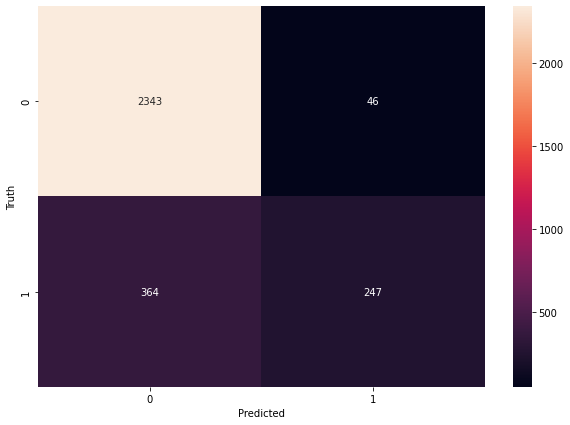

In [ ]:
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_preds)
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

### Image classification -1 small images cifar10 dataset

#### using ANN

In [ ]:
import tensorflow as tf
from tensorflow import keras

In [ ]:
tf.config.experimental.list_physical_devices()

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU')]

In [ ]:
tf.test.is_built_with_cuda()

True

In [ ]:
(x_train, y_train,),(x_test, y_test) = keras.datasets.cifar10.load_data()

170498071/170498071 [==============================] - 2s 0us/step


In [ ]:
x_train.shape

(50000, 32, 32, 3)

In [ ]:
x_test.shape

(10000, 32, 32, 3)

In [ ]:
import matplotlib.pyplot as plt
def plot_sample(index):
    plt.figure(figsize = (10,1))
    plt.imshow(x_train[index])

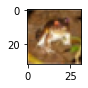

In [ ]:
plot_sample(0)

In [ ]:
y_train[:5]

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

In [ ]:
classes = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]
y_train = y_train.reshape(-1,)
y_test = y_test.reshape(-1,)


In [ ]:
classes[y_train[0]]

'frog'

scaling

In [ ]:
x_test = x_test/255
x_train = x_train/255

one hot encoding

In [ ]:
y_train_categorical = keras.utils.to_categorical(
    y_train, num_classes=10, dtype='float32'
)
y_test_categorical = keras.utils.to_categorical(
    y_test, num_classes=10, dtype='float32'
)

In [ ]:
y_train_categorical[0]

array([0., 0., 0., 0., 0., 0., 1., 0., 0., 0.], dtype=float32)

In [ ]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape = (32,32,3)),
    keras.layers.Dense(3000, activation='relu'),
    keras.layers.Dense(1000, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

In [ ]:
from tensorflow.python.eager.monitoring import Metric
model.compile(
    optimizer='adam',
    loss= 'categorical_crossentropy',
    metrics = ['accuracy']
)

In [ ]:
model.fit(x_train, y_train_categorical, epochs= 5)

Epoch 1/5
1563/1563 [==============================] - 155s 99ms/step - loss: 1.8952 - accuracy: 0.3240
Epoch 2/5
1563/1563 [==============================] - 145s 93ms/step - loss: 1.6792 - accuracy: 0.3934
Epoch 3/5
1563/1563 [==============================] - 134s 86ms/step - loss: 1.6002 - accuracy: 0.4268
Epoch 4/5
1563/1563 [==============================] - 137s 88ms/step - loss: 1.5437 - accuracy: 0.4471
Epoch 5/5
1563/1563 [==============================] - 138s 88ms/step - loss: 1.5041 - accuracy: 0.4600


In [ ]:
model.evaluate(x_test, y_test_categorical)

313/313 [==============================] - 9s 27ms/step - loss: 1.5227 - accuracy: 0.4599


[1.5227402448654175, 0.45989999175071716]

In [ ]:
model2 = keras.Sequential([
    keras.layers.Flatten(input_shape = (32,32,3)),
    keras.layers.Dense(3000, activation='relu'),
    keras.layers.Dense(1000, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

In [ ]:
model2.compile(optimizer='SGD',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

In [ ]:
model2.fit(x_train, y_train_categorical, epochs= 5)

Epoch 1/5
1563/1563 [==============================] - 110s 70ms/step - loss: 1.8141 - accuracy: 0.3512
Epoch 2/5
1563/1563 [==============================] - 110s 71ms/step - loss: 1.6230 - accuracy: 0.4267
Epoch 3/5
1563/1563 [==============================] - 110s 71ms/step - loss: 1.5419 - accuracy: 0.4555
Epoch 4/5
1563/1563 [==============================] - 110s 70ms/step - loss: 1.4820 - accuracy: 0.4762
Epoch 5/5
1563/1563 [==============================] - 110s 70ms/step - loss: 1.4318 - accuracy: 0.4951


In [ ]:
model2.evaluate(x_test, y_test_categorical)

313/313 [==============================] - 9s 29ms/step - loss: 1.5108 - accuracy: 0.4646


[1.5108391046524048, 0.46459999680519104]

#### using CNN

In [ ]:
model_CNN = keras.Sequential([
    keras.layers.Input(shape=(32, 32, 3)),
    keras.layers.Conv2D(filters= 32, kernel_size= (3,3), activation='relu'),
    keras.layers.MaxPool2D((2,2),),

    keras.layers.Conv2D(filters= 64, kernel_size= (3,3), activation='relu'),
    keras.layers.MaxPool2D((2,2),),

    keras.layers.Flatten(),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

In [ ]:
model_CNN.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
model_CNN.fit(x_train, y_train_categorical, epochs= 10)

Epoch 1/10
1563/1563 [==============================] - 70s 45ms/step - loss: 1.4809 - accuracy: 0.4677
Epoch 2/10
1563/1563 [==============================] - 70s 45ms/step - loss: 1.1385 - accuracy: 0.5995
Epoch 3/10
1563/1563 [==============================] - 69s 44ms/step - loss: 1.0055 - accuracy: 0.6480
Epoch 4/10
1563/1563 [==============================] - 70s 45ms/step - loss: 0.9247 - accuracy: 0.6778
Epoch 5/10
1563/1563 [==============================] - 71s 45ms/step - loss: 0.8671 - accuracy: 0.6987
Epoch 6/10
1563/1563 [==============================] - 76s 49ms/step - loss: 0.8147 - accuracy: 0.7163
Epoch 7/10
1563/1563 [==============================] - 71s 46ms/step - loss: 0.7719 - accuracy: 0.7321
Epoch 8/10
1563/1563 [==============================] - 70s 45ms/step - loss: 0.7300 - accuracy: 0.7473
Epoch 9/10
1563/1563 [==============================] - 70s 45ms/step - loss: 0.7000 - accuracy: 0.7569
Epoch 10/10
1563/1563 [==============================] - 71s 46m

In [ ]:
model_CNN.evaluate(x_test,y_test_categorical)

313/313 [==============================] - 5s 14ms/step - loss: 0.9115 - accuracy: 0.6930


[0.9114822149276733, 0.6930000185966492]

In [ ]:
from sklearn.metrics import confusion_matrix , classification_report
import numpy as np
y_pred = model_CNN.predict(x_test)
y_pred_classes = [np.argmax(element) for element in y_pred]

print("Classification Report: \n", classification_report(y_test, y_pred_classes))

313/313 [==============================] - 4s 14ms/step
Classification Report: 
               precision    recall  f1-score   support

           0       0.72      0.71      0.72      1000
           1       0.80      0.81      0.81      1000
           2       0.64      0.56      0.59      1000
           3       0.51      0.53      0.52      1000
           4       0.70      0.58      0.63      1000
           5       0.60      0.59      0.59      1000
           6       0.81      0.73      0.77      1000
           7       0.67      0.80      0.73      1000
           8       0.74      0.84      0.78      1000
           9       0.76      0.78      0.77      1000

    accuracy                           0.69     10000
   macro avg       0.69      0.69      0.69     10000
weighted avg       0.69      0.69      0.69     10000



### image classification MNIST dataset

In [ ]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt


In [ ]:
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

In [ ]:
x_test.shape

(10000, 28, 28)

In [ ]:
y_train[0]

5

In [ ]:
model = keras.Sequential([
    keras.layers.Input(shape=(28,28,1)),

    #first convolution layer
    keras.layers.Conv2D(filters=16, kernel_size=(2,2),activation='relu'),
    keras.layers.MaxPool2D((2,2),),

    #second convolution layer
    keras.layers.Conv2D(filters=32, kernel_size=(3,3),activation='relu'),
    keras.layers.MaxPool2D((2,2),),

    keras.layers.Flatten(),
    keras.layers.Dense(100, activation='relu'),
    keras.layers.Dense(50, activation='relu'),
    keras.layers.Dense(10, activation='sigmoid'),

])

In [ ]:
model.compile(
    optimizer= 'adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy',]
)

In [ ]:
x_train  = x_train/255
x_test  = x_test/255

In [ ]:
model.fit(x_train, y_train, epochs= 10)

Epoch 1/10
1875/1875 [==============================] - 36s 19ms/step - loss: 0.1836 - accuracy: 0.9439
Epoch 2/10
1875/1875 [==============================] - 36s 19ms/step - loss: 0.0648 - accuracy: 0.9798
Epoch 3/10
1875/1875 [==============================] - 36s 19ms/step - loss: 0.0471 - accuracy: 0.9856
Epoch 4/10
1875/1875 [==============================] - 36s 19ms/step - loss: 0.0361 - accuracy: 0.9887
Epoch 5/10
1875/1875 [==============================] - 36s 19ms/step - loss: 0.0288 - accuracy: 0.9907
Epoch 6/10
1875/1875 [==============================] - 36s 19ms/step - loss: 0.0229 - accuracy: 0.9923
Epoch 7/10
1875/1875 [==============================] - 37s 20ms/step - loss: 0.0194 - accuracy: 0.9935
Epoch 8/10
1875/1875 [==============================] - 33s 18ms/step - loss: 0.0159 - accuracy: 0.9945
Epoch 9/10
1875/1875 [==============================] - 33s 18ms/step - loss: 0.0136 - accuracy: 0.9956
Epoch 10/10
1875/1875 [==============================] - 33s 18m

In [ ]:
model.evaluate(x_test, y_test)

313/313 [==============================] - 2s 7ms/step - loss: 0.0558 - accuracy: 0.9844


[0.05577854439616203, 0.9843999743461609]

In [ ]:
y_pred = model.predict(x_test)

y_predicted_labels = [np.argmax(i) for i in y_pred]

cm = tf.math.confusion_matrix(labels=y_test,predictions=y_predicted_labels)

cm

313/313 [==============================] - 2s 7ms/step


<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 961,    1,    0,    0,    2,    1,    1,    1,    1,   12],
       [   0, 1131,    1,    2,    0,    0,    0,    1,    0,    0],
       [   0,    0, 1021,    0,    1,    0,    0,    8,    2,    0],
       [   0,    1,    1, 1002,    1,    3,    0,    0,    2,    0],
       [   0,    0,    1,    0,  971,    0,    0,    0,    0,   10],
       [   2,    0,    0,   13,    0,  874,    1,    0,    1,    1],
       [   2,    4,    2,    0,   12,   10,  922,    0,    6,    0],
       [   0,    2,    1,    0,    2,    0,    0, 1011,    2,   10],
       [   2,    1,    2,    6,    0,    2,    0,    1,  953,    7],
       [   0,    1,    0,    2,    3,    3,    0,    1,    1,  998]],
      dtype=int32)>

Text(69.0, 0.5, 'Truth')

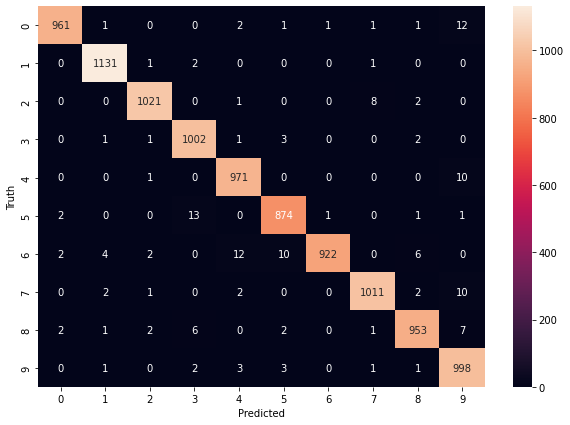

In [ ]:
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

### Data augmentation

In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as  np
from tensorflow import keras
import tensorflow_datasets as tfds


In [2]:
(train_ds, val_ds, test_ds), metadata = tfds.load(
    'tf_flowers',
    split=['train[:80%]', 'train[80%:90%]', 'train[90%:]'],
    with_info=True,
    as_supervised=True,
)

In [3]:
num_classes = metadata.features['label'].num_classes

In [4]:
num_training_examples = 0
num_validation_examples = 0
num_test_examples = 0

for example in train_ds:
  num_training_examples += 1

for example in val_ds:
  num_validation_examples += 1

for example in test_ds:
  num_test_examples += 1

print('Total Number of Training Images: {}'.format(num_training_examples))
print('Total Number of Validation Images: {}'.format(num_validation_examples))
print('Total Number of Test Images: {} \n'.format(num_test_examples))

Total Number of Training Images: 2936
Total Number of Validation Images: 367
Total Number of Test Images: 367 



In [5]:
print(metadata.citation)

@ONLINE {tfflowers,
author = "The TensorFlow Team",
title = "Flowers",
month = "jan",
year = "2019",
url = "http://download.tensorflow.org/example_images/flower_photos.tgz" }


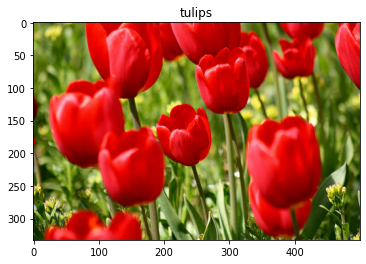

In [6]:
get_label_name = metadata.features['label'].int2str
iter_train = iter(train_ds)
image, label = next(iter_train)
_ = plt.imshow(image)
_ = plt.title(get_label_name(label))

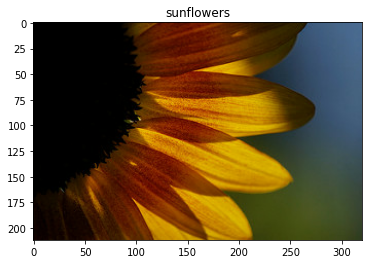

In [7]:
image, label = next(iter_train)
_ = plt.imshow(image)
_ = plt.title(get_label_name(label))

all image have diffrent size so let resize it to a common size

In [8]:
img_size= 180

resize_rescale= keras.Sequential([
    keras.layers.Resizing(img_size, img_size),
    keras.layers.Rescaling(scale=1./255),
])

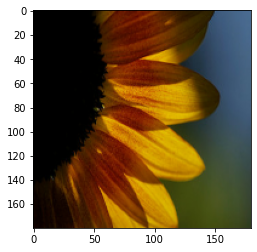

In [9]:
result = resize_rescale(image)
plt.imshow(result)

In [10]:
data_augmentation = tf.keras.Sequential([
  keras.layers.RandomFlip("horizontal_and_vertical"),
  keras.layers.RandomRotation(0.2),
])

after applying data augmentation the values will become float, we can use resize_rescale to get it shown by imshow

WARNING:matplotlib.image:Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


In [11]:
print(image.shape)

image = tf.cast(image, dtype=tf.float32)

image.dtype

(212, 320, 3)


tf.float32

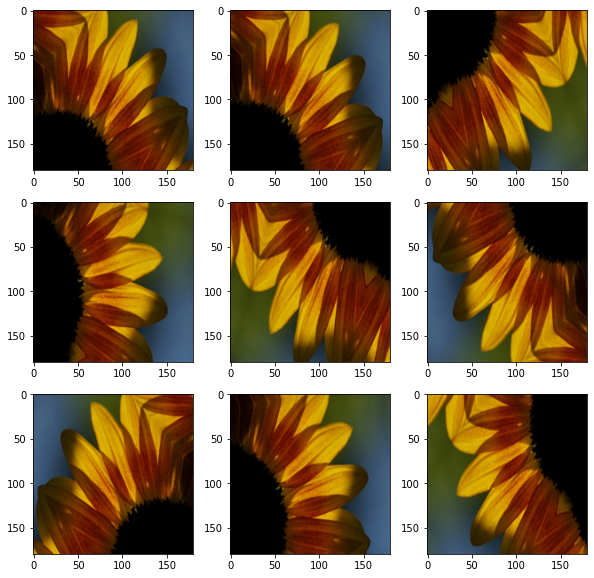

In [12]:
plt.figure(figsize=(10, 10))
for i in range(9):
  augmented_image = data_augmentation(image)
  augmented_image = resize_rescale(augmented_image)
  ax = plt.subplot(3, 3, i + 1)
  plt.imshow(augmented_image)

Apply the preprocessing layers to your dataset

In [13]:
batch_size = 32
AUTOTUNE = tf.data.AUTOTUNE

def prepare(ds, shuffle=False, augment=False):
  # Resize and rescale all datasets.
  ds = ds.map(lambda x, y: (resize_rescale(x), y), 
              num_parallel_calls=AUTOTUNE)

  if shuffle:
    ds = ds.shuffle(1000)

  # Batch all datasets.
  ds = ds.batch(batch_size)

  # Use data augmentation only on the training set.
  if augment:
    ds = ds.map(lambda x, y: (data_augmentation(x, training=True), y), 
                num_parallel_calls=AUTOTUNE)

  # Use buffered prefetching on all datasets.
  return ds.prefetch(buffer_size=AUTOTUNE)

In [29]:
train = prepare(train_ds, shuffle=True, augment=True)
val = prepare(val_ds)
test = prepare(test_ds)

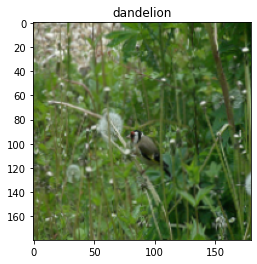

In [32]:
iter_train = iter(train)
image, label = next(iter_train)
_ = plt.imshow(image[0])
_ = plt.title(get_label_name(label[0]))

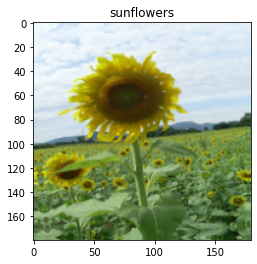

In [31]:
image, label = next(iter_train)
_ = plt.imshow(image[0])
_ = plt.title(get_label_name(label[0]))

In [15]:
model = tf.keras.Sequential([
  keras.layers.Conv2D(16, 2, padding='same', activation='relu'),
  keras.layers.MaxPooling2D(),
  keras.layers.Conv2D(32, 2, padding='same', activation='relu'),
  keras.layers.MaxPooling2D(),
  keras.layers.Conv2D(64, 2, padding='same', activation='relu'),
  keras.layers.MaxPooling2D(),
  keras.layers.Flatten(),
  keras.layers.Dense(128, activation='relu'),
  keras.layers.Dense(num_classes)
])

Note: Data augmentation is inactive at test time so input images will only be augmented during calls to Model.fit (not Model.evaluate or Model.predict).


In [16]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [17]:
model.fit(train, validation_data= val, epochs= 20)

Epoch 1/20
92/92 [==============================] - 22s 163ms/step - loss: 1.3352 - accuracy: 0.4332 - val_loss: 1.0904 - val_accuracy: 0.5559
Epoch 2/20
92/92 [==============================] - 10s 107ms/step - loss: 1.0711 - accuracy: 0.5797 - val_loss: 1.0249 - val_accuracy: 0.6049
Epoch 3/20
92/92 [==============================] - 10s 106ms/step - loss: 0.9965 - accuracy: 0.6005 - val_loss: 0.9737 - val_accuracy: 0.6104
Epoch 4/20
92/92 [==============================] - 10s 105ms/step - loss: 0.9202 - accuracy: 0.6396 - val_loss: 0.8953 - val_accuracy: 0.6540
Epoch 5/20
92/92 [==============================] - 13s 131ms/step - loss: 0.8800 - accuracy: 0.6553 - val_loss: 0.8921 - val_accuracy: 0.6349
Epoch 6/20
92/92 [==============================] - 11s 117ms/step - loss: 0.8555 - accuracy: 0.6631 - val_loss: 0.9278 - val_accuracy: 0.6485
Epoch 7/20
92/92 [==============================] - 10s 107ms/step - loss: 0.8325 - accuracy: 0.6683 - val_loss: 0.8540 - val_accuracy: 0.6594

In [18]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 180, 180, 16)      208       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 90, 90, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 90, 90, 32)        2080      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 45, 45, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 45, 45, 64)        8256      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 22, 22, 64)      

In [19]:
model.evaluate(test)

12/12 [==============================] - 0s 19ms/step - loss: 0.7140 - accuracy: 0.7248


[0.7140301465988159, 0.7247956395149231]

option 2: embed the data augmentation layer in model

resize the image and batch them

In [20]:
train =train_ds.map(lambda x, y: (resize_rescale(x), y)).batch(32)
test =test_ds.map(lambda x, y: (resize_rescale(x), y)).batch(32)
val =val_ds.map(lambda x, y: (resize_rescale(x), y)).batch(32)

In [21]:
data_augmentation = keras.Sequential(
  [
    keras.layers.RandomFlip("horizontal", input_shape=(img_size,img_size,3)),
    keras.layers.RandomRotation(0.1),
    keras.layers.RandomZoom(0.1),
  ]
)

In [22]:
model2 = tf.keras.Sequential([
  resize_rescale,
  data_augmentation,
  keras.layers.Conv2D(16, 3, padding='same', activation='relu'),
  keras.layers.MaxPooling2D(),
  keras.layers.Conv2D(32, 3, padding='same', activation='relu'),
  keras.layers.MaxPooling2D(),
  keras.layers.Conv2D(64, 3, padding='same', activation='relu'),
  keras.layers.MaxPooling2D(),
  keras.layers.Flatten(),
  keras.layers.Dense(128, activation='relu'),
  keras.layers.Dense(num_classes,)
])



In [23]:
model2.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [24]:
model2.fit(train, validation_data= val, epochs= 20)

Epoch 1/20


92/92 [==============================] - ETA: 0s - loss: 1.6030 - accuracy: 0.2503

92/92 [==============================] - 7s 60ms/step - loss: 1.6030 - accuracy: 0.2503 - val_loss: 1.6052 - val_accuracy: 0.2425
Epoch 2/20
92/92 [==============================] - 5s 59ms/step - loss: 1.6043 - accuracy: 0.2517 - val_loss: 1.5985 - val_accuracy: 0.2425
Epoch 3/20
92/92 [==============================] - 6s 60ms/step - loss: 1.6024 - accuracy: 0.2517 - val_loss: 1.5944 - val_accuracy: 0.2425
Epoch 4/20
92/92 [==============================] - 6s 60ms/step - loss: 1.6015 - accuracy: 0.2517 - val_loss: 1.5943 - val_accuracy: 0.2425
Epoch 5/20
92/92 [==============================] - 5s 59ms/step - loss: 1.6011 - accuracy: 0.2517 - val_loss: 1.5941 - val_accuracy: 0.2425
Epoch 6/20
92/92 [==============================] - 6s 60ms/step - loss: 1.6007 - accuracy: 0.2517 - val_loss: 1.5939 - val_accuracy: 0.2425
Epoch 7/20
92/92 [==============================] - 6s 60ms/step - loss: 1.6004 - accuracy: 0.2517 - val_loss: 1.5937 - val_accuracy: 0.2425
Epoch 8/20
92/92 [======

In [25]:
model2.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (180, 180, 3)             0         
                                                                 
 sequential_3 (Sequential)   (None, 180, 180, 3)       0         
                                                                 
 conv2d_3 (Conv2D)           (None, 180, 180, 16)      448       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 90, 90, 16)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 90, 90, 32)        4640      
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 45, 45, 32)       0         
 2D)                                                  

In [26]:
model2.evaluate(test)

12/12 [==============================] - 0s 19ms/step - loss: 1.6163 - accuracy: 0.1907


[1.6163333654403687, 0.19073569774627686]

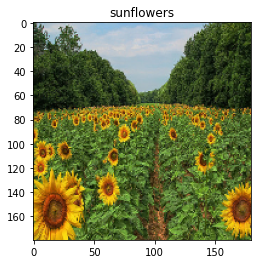

In [27]:
iter_train = iter(train)
image, label = next(iter_train)
_ = plt.imshow(image[31])
_ = plt.title(get_label_name(label[31]))

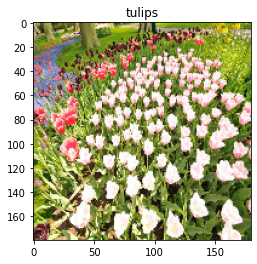

In [28]:

image, label = next(iter_train)
_ = plt.imshow(image[0])
_ = plt.title(get_label_name(label[0]))